In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/train.csv')
y_train = df['label']
df = df.drop('label', 1)
x_train = df.values

In [4]:
df_test = pd.read_csv('data/test.csv')
test = df_test.values

<function matplotlib.pyplot.show(*args, **kw)>

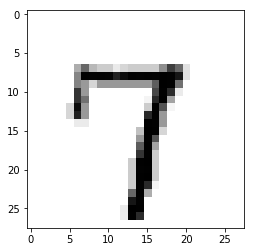

In [5]:
seven = x_train[6]
reshaped = seven.reshape(28,28)
plt.imshow(reshaped, cmap=matplotlib.cm.binary,
            interpolation="nearest")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

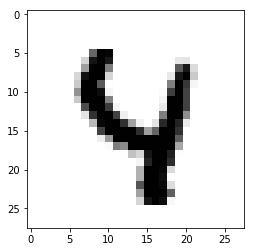

In [6]:
four = x_train[66]
reshaped = four.reshape(28,28)
plt.imshow(reshaped, cmap=matplotlib.cm.binary,
            interpolation="nearest")
plt.show


In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
sgd_clf.predict([seven])

array([7])

In [9]:
sgd_clf.predict([four])

array([4])

In [10]:
# SGD classifier
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.86418166, 0.86555222, 0.88841263])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.90809769, 0.90698671, 0.91205887])

In [18]:
sgd = sgd_clf.predict(test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)
print(cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy"))
forestpred = forest_clf.predict(test)

[0.93159097 0.93749107 0.93684812]


In [14]:
forestpred

array([2, 0, 9, ..., 3, 9, 2])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=5,p=2,weights='distance')
knnclf.fit(x_train, y_train)
print(cross_val_score(knnclf, x_train, y_train, cv=3, scoring="accuracy"))
knnpred = knnclf.predict(test)

[0.96543845 0.96442349 0.96670953]


In [16]:
print(knnpred)

[2 0 9 ... 3 9 2]


In [15]:
import csv

with open('submission1.csv', 'w') as csvfile:
    fieldnames = ["ImageId", "Label"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(forestpred)):
        writer.writerow({"ImageId": i+1, "Label": forestpred[i]})